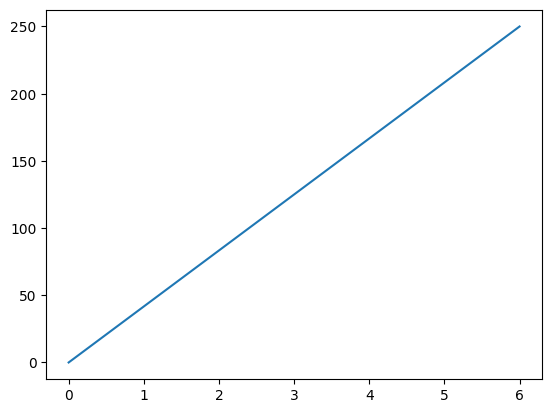

In [39]:
import matplotlib.pyplot as plt
import numpy as np

xpoints = np.array([0, 6])
ypoints = np.array([0, 250])

plt.plot(xpoints, ypoints)
plt.show()

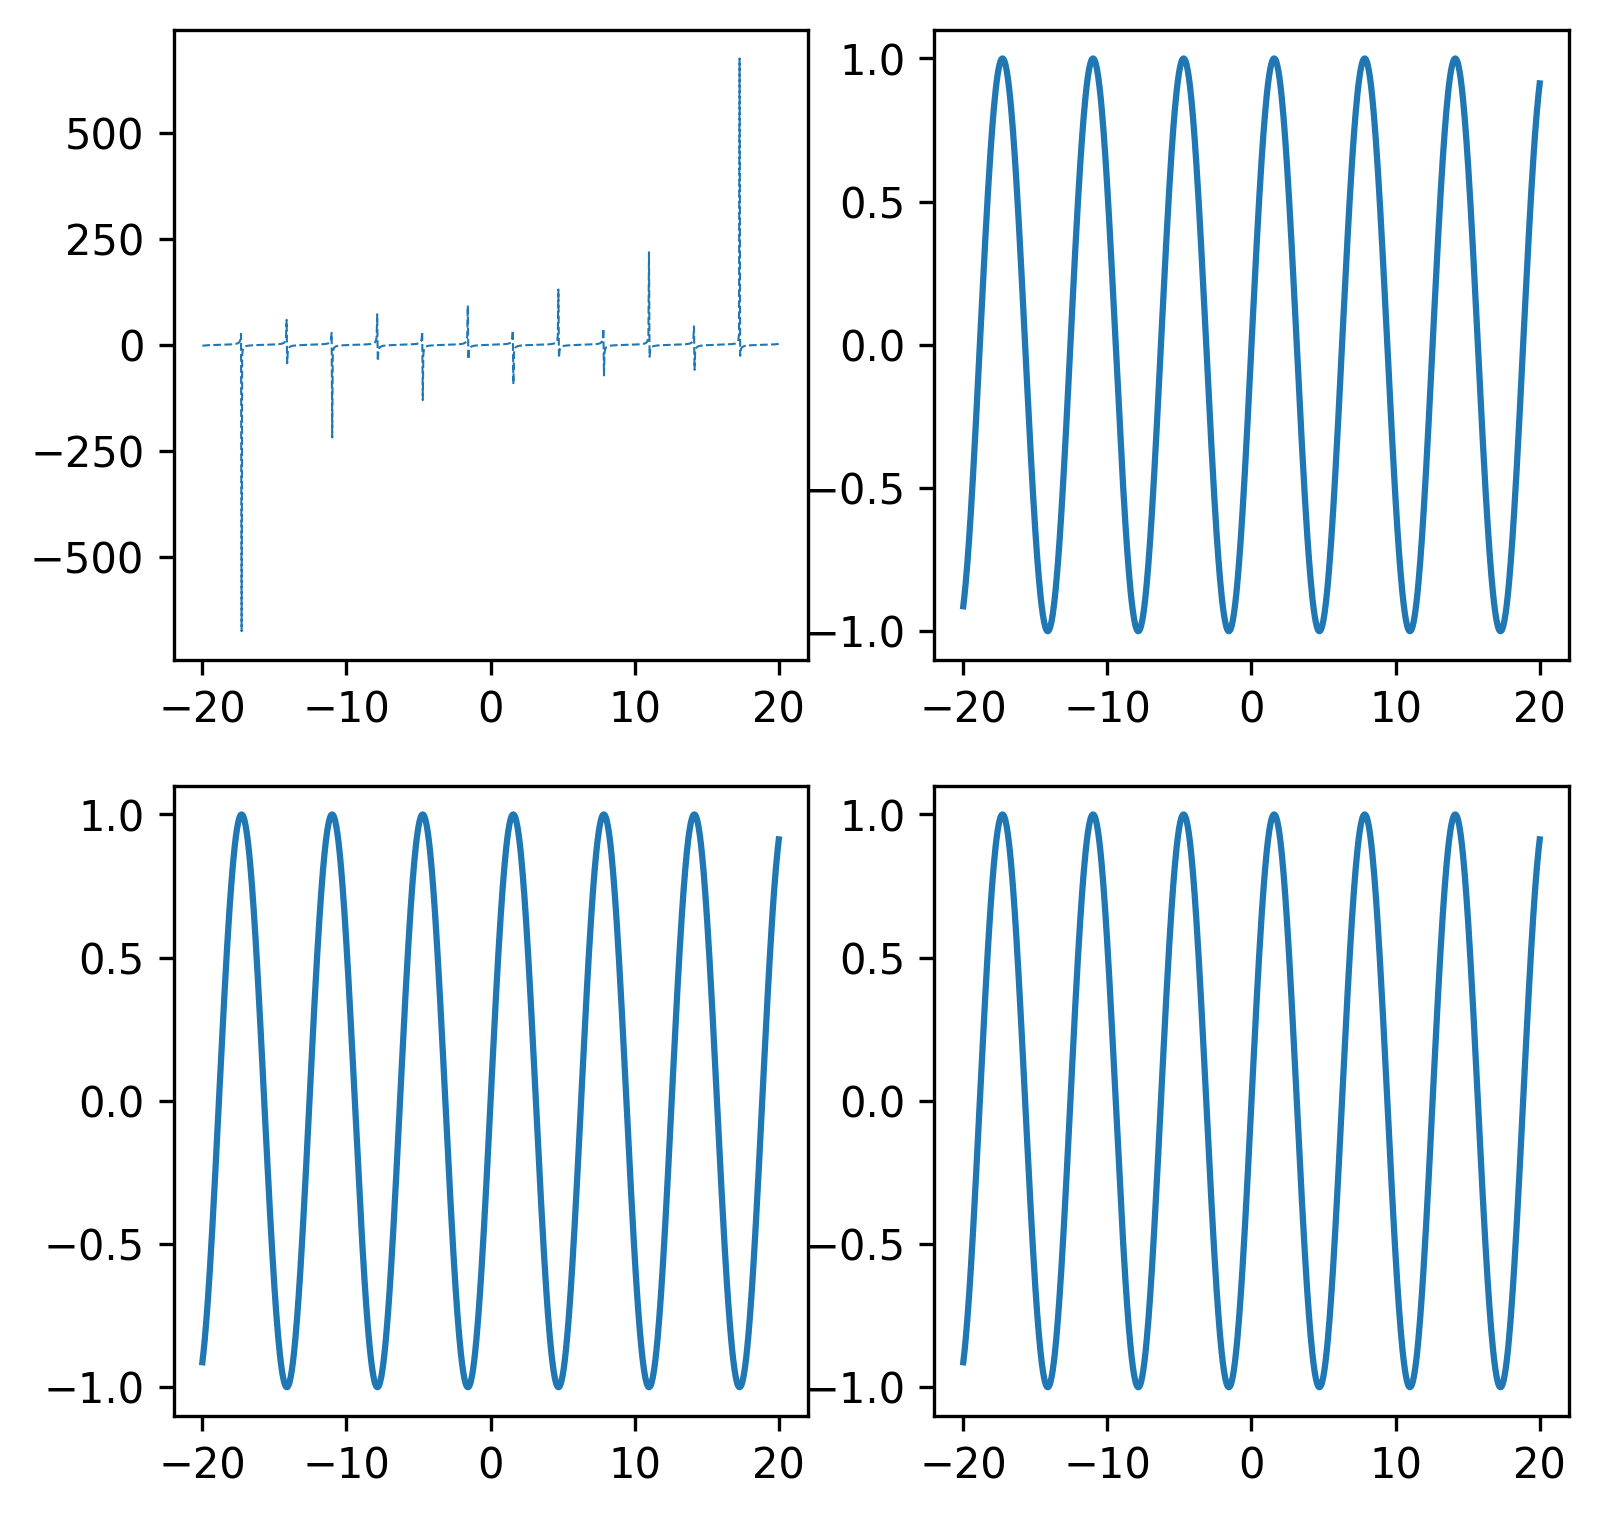

In [ ]:
a = np.linspace(-20, 20 , 1000)
b1= np.tan(a)
b2= np.sin(a)
b3= np.cos(a)
b4= np.tanh(a)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6,6), dpi=300)
axes[0][0].plot(a,b1, label='tan', lw=0.5, ls='--')
axes[0][1].plot(a,b2)
axes[1][0].plot(a,b2)
axes[1][1].plot(a,b2)


In [ ]:
import pandas as pd

data = pd.read_csv('dm_office_sales.csv')
df = pd.DataFrame(data)
print(df)

              division  level of education  training level  work experience  \
0             printers        some college               2                6   
1             printers  associate's degree               2               10   
2          peripherals         high school               0                9   
3      office supplies  associate's degree               2                5   
4      office supplies         high school               1                5   
..                 ...                 ...             ...              ...   
995  computer hardware  associate's degree               1                1   
996  computer software  associate's degree               1                0   
997        peripherals  associate's degree               2                8   
998        peripherals  associate's degree               2                3   
999  computer hardware        some college               0                9   

     salary   sales  
0     91684  372302  
1    11

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   division            1000 non-null   object
 1   level of education  1000 non-null   object
 2   training level      1000 non-null   int64 
 3   work experience     1000 non-null   int64 
 4   salary              1000 non-null   int64 
 5   sales               1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


,training level,work experience,salary,sales
count,1000.000000,1000.00000,1000.000000,1000.000000
mean,1.262000,6.14200,90264.207000,339833.846000
std,0.925317,2.94797,17398.617174,108555.773316
min,0.000000,0.00000,41660.000000,53067.000000
25%,1.000000,4.00000,77584.000000,259257.500000
50%,1.000000,6.00000,89946.000000,338145.500000
75%,2.000000,8.00000,101834.250000,415210.250000
max,3.000000,16.00000,159148.000000,761477.000000


In [ ]:
#MLP Regressor in Scikit-Learn
X = df.iloc[:,:-1]
y = df.iloc[:,-1]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=402)


In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
encoder = OneHotEncoder(sparse_output=False, drop='first')
scaler = StandardScaler()

In [ ]:
X_train

,division,level of education,training level,work experience,salary
726,office supplies,bachelor's degree,2,7,97227
397,printers,associate's degree,1,3,74037
128,computer software,associate's degree,1,10,115164
207,office supplies,some college,2,4,81063
741,office supplies,associate's degree,2,9,111905
...,...,...,...,...,...
990,printers,some college,0,3,68353
202,printers,associate's degree,2,10,122390
326,office supplies,some college,1,4,77702
6,peripherals,associate's degree,0,5,77548


In [ ]:
encoder.fit(X_train[['division','level of education']])

OneHotEncoder(drop='first', sparse_output=False)

In [ ]:
scaler.fit(X_train[['training level', 'work experience', 'salary']])

StandardScaler()

In [ ]:
X_train_encoded = encoder.transform(X_train[['division','level of education']])

In [ ]:
X_train_encoded.shape

(700, 8)

In [ ]:
X_train_scaled = scaler.transform(X_train[['training level', 'work experience', 'salary']])

In [ ]:
X_train_scaled.shape

(700, 3)

In [ ]:
X_train_transf = np.hstack((X_train_scaled, X_train_encoded))
X_train_transf

array([[ 0.80871902,  0.26123724,  0.37631373, ...,  0.        ,
         0.        ,  0.        ],
       [-0.27163082, -1.06628413, -0.92718528, ...,  0.        ,
         0.        ,  0.        ],
       [-0.27163082,  1.25687827,  1.38454409, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.27163082, -0.73440379, -0.72117735, ...,  0.        ,
         0.        ,  1.        ],
       [-1.35198065, -0.40252344, -0.72983362, ...,  0.        ,
         0.        ,  0.        ],
       [-1.35198065,  1.25687827,  0.98034135, ...,  0.        ,
         0.        ,  0.        ]], shape=(700, 11))

In [59]:
X_test_encoded = encoder.transform(X_test[['division', 'level of education']])
X_test_encoded.shape[1]

7

In [58]:
X_test_scaled = scaler.transform(X_test[['training level', 'work experience', 'salary']])
X_test_scaled.shape[1]

3

In [56]:
X_test_transf = np.hstack((X_test_scaled, X_test_encoded))
X_test_transf

array([[-0.31072252, -0.35159834, -0.09524245, ...,  0.        ,
         0.        ,  1.        ],
       [-0.31072252,  0.36839826,  0.12811067, ...,  0.        ,
         0.        ,  0.        ],
       [-1.39463828, -0.35159834, -1.16700817, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.31072252,  2.16838977,  1.28896153, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.77319324, -0.35159834,  0.18433004, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.77319324, -1.43159324, -0.85956988, ...,  0.        ,
         0.        ,  1.        ]], shape=(300, 10))

In [ ]:
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1,1))
y_train_scaled

array([[ 4.69437758e-01],
       [-1.02202588e+00],
       [ 7.38797365e-01],
       [-4.34450340e-02],
       [ 1.08695117e+00],
       [-1.64893769e+00],
       [-6.58140764e-01],
       [-1.04260323e+00],
       [ 6.06899700e-02],
       [ 1.46672362e+00],
       [ 6.14635692e-01],
       [ 1.14072581e+00],
       [ 6.57359863e-01],
       [-1.69668230e+00],
       [-6.72724805e-01],
       [ 1.69569948e+00],
       [-6.89594198e-01],
       [-8.64538435e-01],
       [-2.25291221e-01],
       [-2.59048364e-01],
       [-5.36815133e-01],
       [ 3.49553092e-01],
       [ 7.15484928e-01],
       [-2.86498968e-02],
       [-4.09174951e-01],
       [ 3.37154612e-02],
       [ 8.01805191e-01],
       [ 5.16806060e-01],
       [ 1.02184156e+00],
       [ 9.98767750e-01],
       [ 2.30411854e-01],
       [-6.15682759e-01],
       [ 4.95824867e-01],
       [-4.54845300e-01],
       [ 7.90901579e-01],
       [ 1.45134108e+00],
       [ 6.12478833e-01],
       [-9.26417352e-01],
       [-7.4

In [52]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(
    hidden_layer_sizes=(10,10),
    activation='relu',
    solver='adam',
    random_state=45,
    max_iter=1000,
    learning_rate_init=0.001,
    batch_size=8,
    early_stopping=True
)

model.fit(X_train_transf, y_train_scaled.ravel())



MLPRegressor(batch_size=8, early_stopping=True, hidden_layer_sizes=(10, 10),
             max_iter=1000, random_state=45)

In [43]:
y_pred = model.predict(X_test_transf)

ValueError: X has 10 features, but MLPRegressor is expecting 11 features as input.